# this is my first file created on this project, while I still struggle to famaliar with the usage of python packages... so the code looks a bit messy. I decide to include this as part of the submited code so that one might see my improvements in code... although there is also a lot more that can be achieved.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('C:/Users/hasee/Desktop/all.csv')
df.head()
df=df.dropna()
print(list(df.columns))
df.describe()

['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail', 'vmail_message', 'day_minute', 'day_call', 'day_charge', 'eve_minute', 'eve_call', 'eve_charge', 'night_minute', 'night_call', 'night_charge', 'intl_minute', 'intl_call', 'intl_charge', 'customer_service', 'churn']


,account_length,area_code,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
df = pd.read_csv('C:/Users/hasee/Desktop/all.csv')
df.head()
df=df.dropna()
print(list(df.columns))
df.describe()

['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail', 'vmail_message', 'day_minute', 'day_call', 'day_charge', 'eve_minute', 'eve_call', 'eve_charge', 'night_minute', 'night_call', 'night_charge', 'intl_minute', 'intl_call', 'intl_charge', 'customer_service', 'churn']


,account_length,area_code,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
data2 = df[df.churn==' True.'] 

# check distribution of day charge

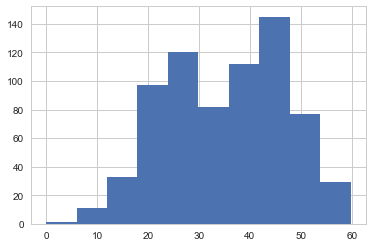

In [5]:
data2.day_charge.hist()

In [6]:
df['state'].unique()
data=df

In [7]:
df['churn'].value_counts()

 False.    4293
 True.      707
Name: churn, dtype: int64

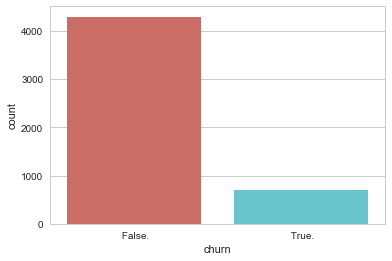

In [8]:
sns.countplot(x='churn',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [9]:
df.groupby('churn').mean()

,account_length,area_code,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service
churn,,,,,,,,,,,,,,,,
False.,99.917074,436.736781,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
True.,102.332390,437.971711,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


In [10]:
df.groupby('state').mean()

,account_length,area_code,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service
state,,,,,,,,,,,,,,,,
AK,99.291667,438.611111,9.430556,180.958333,99.541667,30.763333,189.683333,98.986111,16.122917,197.870833,99.111111,8.904028,9.881944,4.652778,2.668750,1.444444
AL,96.669355,428.290323,6.717742,189.474194,99.129032,32.210887,199.669355,97.596774,16.972097,187.160484,98.177419,8.422419,10.412903,4.500000,2.811694,1.475806
AR,95.728261,434.858696,10.021739,175.185870,99.923913,29.782065,197.918478,98.445652,16.823370,205.045652,101.206522,9.227283,10.151087,4.750000,2.740870,1.760870
AZ,103.820225,433.629213,9.662921,176.457303,100.056180,29.998315,195.919101,101.348315,16.653258,191.632584,99.955056,8.623820,10.544944,4.752809,2.847640,1.528090
CA,100.519231,442.750000,6.307692,172.932692,102.538462,29.399038,194.632692,101.153846,16.544423,199.767308,96.096154,8.989615,9.975000,4.346154,2.694038,1.538462
CO,98.343750,430.479167,8.583333,176.411458,97.906250,29.990521,204.292708,99.906250,17.364792,188.827083,95.781250,8.497917,9.779167,4.333333,2.640833,1.677083
CT,96.404040,435.232323,9.333333,175.576768,97.979798,29.848384,201.148485,98.929293,17.097980,202.327273,102.040404,9.105152,10.375758,4.070707,2.801515,1.595960
DC,101.795455,438.238636,9.886364,172.423864,101.000000,29.313068,197.865909,101.318182,16.819205,210.781818,102.102273,9.485341,10.514773,3.965909,2.839773,1.420455
DE,96.851064,435.968085,8.170213,183.543617,98.095745,31.203085,206.446809,96.712766,17.548511,206.054255,98.468085,9.272660,10.606383,4.223404,2.865000,1.702128


In [36]:
df.loc[:,'international_plan'] =np.array([0] * len(df[df.international_plan==' no']))
      

ValueError: Must have equal len keys and value when setting with an iterable

In [37]:
df['international_plan'==' no']=0
   

In [39]:
data=df.copy()

In [40]:
data['international_plan'==' no']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4970    0
4971    0
4972    0
4973    0
4974    0
4975    0
4976    0
4977    0
4978    0
4979    0
4980    0
4981    0
4982    0
4983    0
4984    0
4985    0
4986    0
4987    0
4988    0
4989    0
4990    0
4991    0
4992    0
4993    0
4994    0
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64

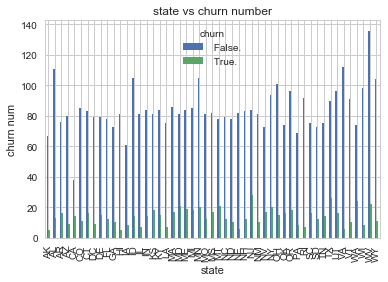

In [41]:
%matplotlib inline
pd.crosstab(data.state,data.churn).plot(kind='bar')
plt.title('state vs churn number')
plt.xlabel('state')
plt.ylabel('churn num')
plt.savefig('state_and_churn')

# check distribution of churn rate given different state / voicemail / international plan

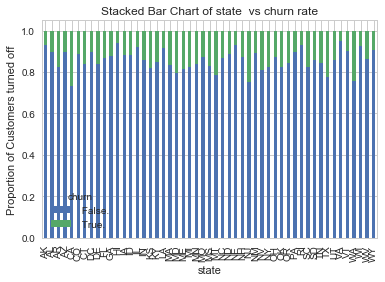

In [42]:
table=pd.crosstab(data.state,data.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of state  vs churn rate')
plt.xlabel('state')
plt.ylabel('Proportion of Customers turned off')
plt.savefig('state vs churn')

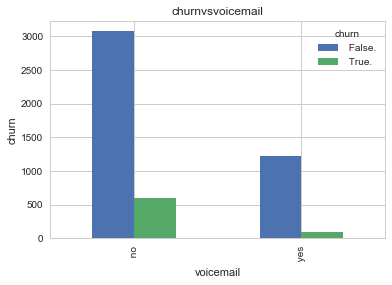

In [43]:
pd.crosstab(data.voice_mail,data.churn).plot(kind='bar')
plt.title('churnvsvoicemail')
plt.xlabel('voicemail')
plt.ylabel('churn')
plt.savefig('voicemailvschurn')

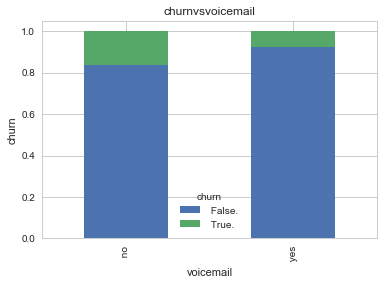

In [44]:
table2=pd.crosstab(data.voice_mail,data.churn)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('churnvsvoicemail')
plt.xlabel('voicemail')
plt.ylabel('churn')
plt.savefig('voicemailvschurn')

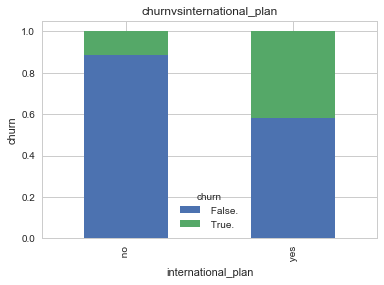

In [45]:
table3=pd.crosstab(data.international_plan,data.churn)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('churnvsinternational_plan')
plt.xlabel('international_plan')
plt.ylabel('churn')
plt.savefig('international_planvschurn')

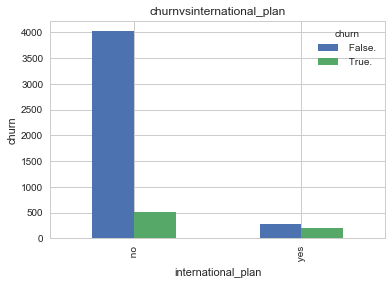

In [46]:
pd.crosstab(data.international_plan,data.churn).plot(kind='bar')
plt.title('churnvsinternational_plan')
plt.xlabel('international_plan')
plt.ylabel('churn')
plt.savefig('international_planvschurn')

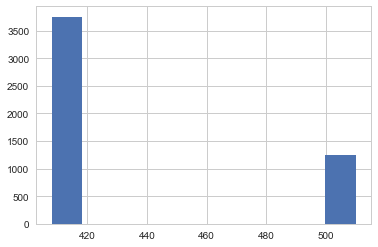

In [47]:
data.area_code.hist()

In [48]:
data.area_code.unique()

array([415, 408, 510], dtype=int64)

In [49]:
data

,state,account_length,area_code,phone_number,international_plan,voice_mail,vmail_message,day_minute,day_call,day_charge,...,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service,churn,False
0,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
1,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
2,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
3,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,0
4,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,0
5,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,0
6,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True.,0
7,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,13.89,196.0,94,8.82,9.1,5,2.46,0,False.,0
8,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,8.92,141.1,128,6.35,11.2,2,3.02,1,False.,0
9,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,21.05,192.3,115,8.65,12.3,5,3.32,3,False.,0


# check the distribution of account length and day_minute... not quite useful

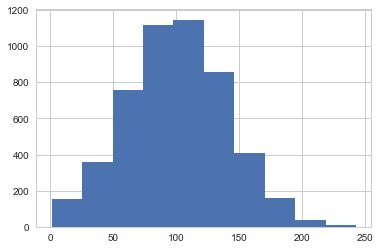

In [50]:
data.account_length.hist()

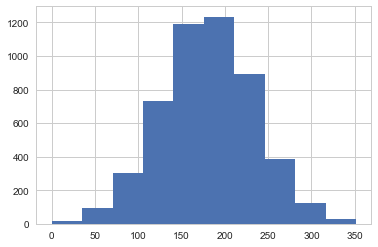

In [51]:
data.day_minute.hist()

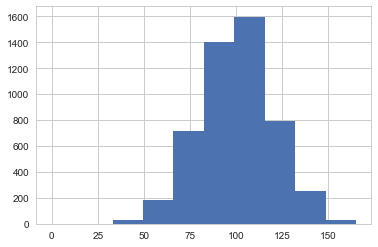

In [52]:
data.day_call.hist()

In [53]:
cat_vars=['state','account_length','area_code','phone_number','international_plan','voice_mail','vmail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','customer_service']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['state','account_length','area_code','phone_number','international_plan','voice_mail','vmail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','customer_service']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [54]:
data_final=data[to_keep]
data_final.columns.values

array(['churn', False, 'state_AK', ..., 'customer_service_7',
       'customer_service_8', 'customer_service_9'], dtype=object)

In [55]:
data

,state,account_length,area_code,phone_number,international_plan,voice_mail,vmail_message,day_minute,day_call,day_charge,...,customer_service_0,customer_service_1,customer_service_2,customer_service_3,customer_service_4,customer_service_5,customer_service_6,customer_service_7,customer_service_8,customer_service_9
0,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,1,0,0,0,0,0,0,0,0,0
1,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,0,0,1,0,0,0,0,0,0,0
2,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,0,0,0,1,0,0,0,0,0,0
3,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,1,0,0,0,0,0,0,0,0,0
4,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,1,0,0,0,0,0,0,0,0,0
5,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,0,1,0,0,0,0,0,0,0,0
6,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,0,0,0,0,1,0,0,0,0,0
7,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,1,0,0,0,0,0,0,0,0,0
8,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,0,1,0,0,0,0,0,0,0,0
9,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,0,0,0,1,0,0,0,0,0,0


In [56]:
data_final_vars=data_final.columns.values.tolist()
y=['churn']
X=[i for i in data_final_vars if i not in y]

In [57]:
print(X)

[False, 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'account_length_1', 'account_length_2', 'account_length_3', 'account_length_4', 'account_length_5', 'account_length_6', 'account_length_7', 'account_length_8', 'account_length_9', 'account_length_10', 'account_length_11', 'account_length_12', 'account_length_13', 'account_length_14', 'account_length_15', 'account_length_16', 'account_length_17', 'account_length_18', 'account_le

In [58]:
y

['churn']

In [59]:
data_final['churn']

0        False.
1        False.
2        False.
3        False.
4        False.
5        False.
6         True.
7        False.
8        False.
9        False.
10       False.
11        True.
12       False.
13       False.
14       False.
15        True.
16       False.
17       False.
18       False.
19       False.
20       False.
21       False.
22       False.
23       False.
24       False.
25       False.
26        True.
27       False.
28       False.
29       False.
         ...   
4970     False.
4971     False.
4972     False.
4973     False.
4974     False.
4975     False.
4976     False.
4977     False.
4978     False.
4979     False.
4980     False.
4981     False.
4982     False.
4983     False.
4984     False.
4985     False.
4986     False.
4987     False.
4988     False.
4989     False.
4990     False.
4991      True.
4992     False.
4993     False.
4994     False.
4995     False.
4996     False.
4997     False.
4998     False.
4999     False.
Name: churn, Length: 500

In [60]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 21)
rfe = rfe.fit(data_final[X], data_final[y].values.ravel() )


KeyboardInterrupt: 

In [ ]:
data_final[y].values.ravel()

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['churn']